### *Importing & Loading what we need* 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

data = pd.read_csv("DataSet/diabetes.csv")

In [2]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### *Data Preprocessing*

In [3]:
print("\nShape of the dataset:", data.shape)


Shape of the dataset: (768, 9)


In [4]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
print("\nStatistical Summary:")
data.describe()


Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_cols))

Numerical Columns: 9


In [8]:
print("\nDistribution of 'Outcome' variable:")
print(data['Outcome'].value_counts())


Distribution of 'Outcome' variable:
Outcome
0    500
1    268
Name: count, dtype: int64


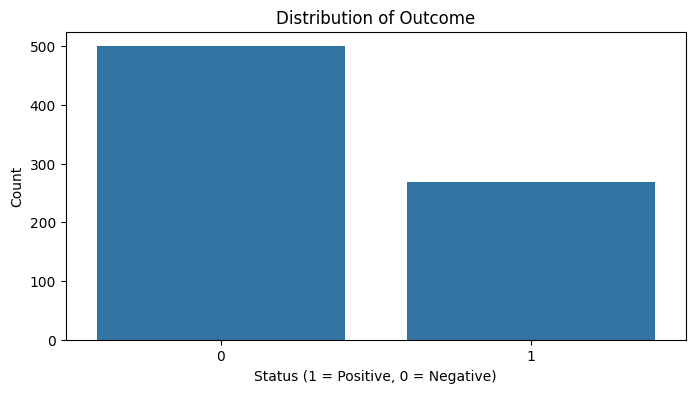

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome')
plt.xlabel('Status (1 = Positive, 0 = Negative)')
plt.ylabel('Count')
plt.show()

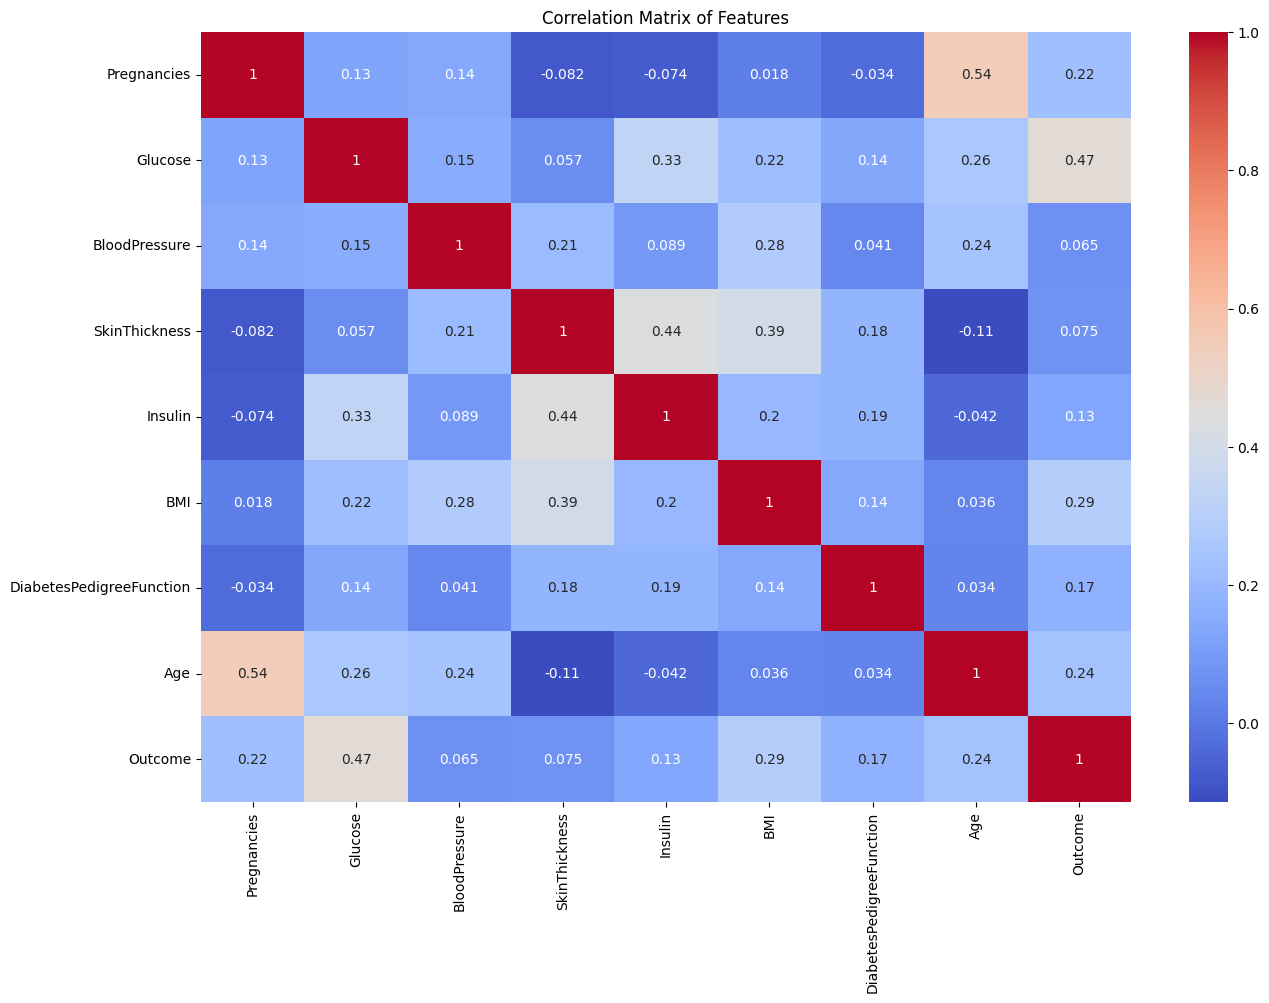

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

### *Check & Removing outliers identified using IQR*

In [11]:
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers_iqr = outlier_condition.any(axis=1)
print(f'Number of outlier rows using IQR: {np.sum(outliers_iqr)}')

Number of outlier rows using IQR: 129


In [12]:
data_cleaned = data[~outliers_iqr] 

### *Model Training*

In [13]:
X = data_cleaned.drop(columns=['Outcome'], axis=1)
y = data_cleaned['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.828125

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        92
           1       0.82      0.50      0.62        36

    accuracy                           0.83       128
   macro avg       0.82      0.73      0.75       128
weighted avg       0.83      0.83      0.81       128



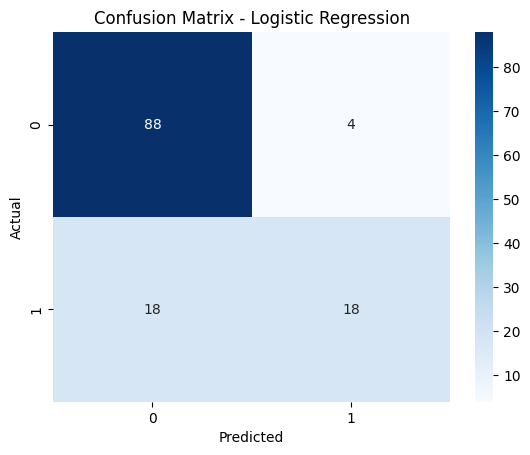

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()